# Proyek Analisis Data: [Data Analyst Salary]


# Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : How much Average Data Analyst salary per year by experience level?
- Pertanyaan 2 : Do company size and experience Level impact on average salary?

# Import Semua Packages/Library yang Digunakan

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [30]:
# get the name of the csv file 
file = r"D:\\karir\\Data Analyst\\Data Analyst Portofolio\\Project\\jobs_in_data.csv"
# read the csv file into a pandas DataFrame using the pd.read_csv()
df = pd.read_csv(file) 
df.head()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### Assessing Data

In [38]:
#In this project, i am going yo analyze the job salary of Data Analyst so I will only include row with job title "data analyst"
df = df[df['job_title'] == 'Data Analyst']
df.head()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
15,2023,Data Analyst,Data Analysis,USD,95000,95000,United States,Entry-level,Full-time,In-person,United States,M
16,2023,Data Analyst,Data Analysis,USD,75000,75000,United States,Entry-level,Full-time,In-person,United States,M
23,2023,Data Analyst,Data Analysis,USD,155000,155000,United States,Mid-level,Full-time,In-person,United States,M
24,2023,Data Analyst,Data Analysis,USD,110000,110000,United States,Mid-level,Full-time,In-person,United States,M
41,2023,Data Analyst,Data Analysis,USD,176000,176000,United States,Senior,Full-time,In-person,United States,M


In the table, it contain two salary column, we must drop one becauce its similar. Lets take salary_in_usd

In [39]:
df = df.drop(columns='salary',axis=1)

In [40]:
df.sample(10)

,work_year,job_title,job_category,salary_currency,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
8841,2022,Data Analyst,Data Analysis,GBP,36940,United Kingdom,Mid-level,Full-time,Remote,United Kingdom,M
8041,2022,Data Analyst,Data Analysis,USD,115934,United States,Senior,Full-time,Remote,United States,M
4471,2023,Data Analyst,Data Analysis,USD,125000,United States,Entry-level,Full-time,In-person,United States,M
4932,2023,Data Analyst,Data Analysis,USD,120000,United States,Senior,Full-time,Remote,United States,M
3933,2023,Data Analyst,Data Analysis,USD,138860,United States,Senior,Full-time,In-person,United States,M
8919,2022,Data Analyst,Data Analysis,USD,110000,United States,Executive,Full-time,Remote,United States,M
7538,2022,Data Analyst,Data Analysis,USD,100000,United States,Mid-level,Full-time,In-person,United States,M
2203,2023,Data Analyst,Data Analysis,USD,46500,United States,Mid-level,Full-time,In-person,United States,M
900,2023,Data Analyst,Data Analysis,USD,105000,United States,Senior,Full-time,Remote,United States,M
6079,2023,Data Analyst,Data Analysis,USD,155000,United States,Senior,Full-time,In-person,United States,M


### Cleaning Data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 15 to 9338
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1388 non-null   int64 
 1   job_title           1388 non-null   object
 2   job_category        1388 non-null   object
 3   salary_currency     1388 non-null   object
 4   salary_in_usd       1388 non-null   int64 
 5   employee_residence  1388 non-null   object
 6   experience_level    1388 non-null   object
 7   employment_type     1388 non-null   object
 8   work_setting        1388 non-null   object
 9   company_location    1388 non-null   object
 10  company_size        1388 non-null   object
dtypes: int64(2), object(9)
memory usage: 130.1+ KB


In [43]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

data clean and ready to analyze

## Exploratory Data Analysis (EDA)

In [45]:
df['salary_in_usd'].describe()

count      1388.000000
mean     109911.472622
std       42994.095507
min       15000.000000
25%       80000.000000
50%      105320.000000
75%      135000.000000
max      430967.000000
Name: salary_in_usd, dtype: float64

In [46]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [47]:
df['company_location'].value_counts()

company_location
United States               1219
United Kingdom                85
Canada                        29
Spain                         16
Estonia                        6
Australia                      4
Germany                        4
France                         3
Greece                         3
Portugal                       3
Colombia                       2
India                          2
Croatia                        2
Slovenia                       2
Poland                         2
Central African Republic       2
Philippines                    1
Argentina                      1
Singapore                      1
Indonesia                      1
Name: count, dtype: int64

In [48]:
df['country_category'] = df['company_location'].apply(lambda x: 'United States' if x == 'United States' else 'Non-United States')

In [49]:
df['country_category'].value_counts()

country_category
United States        1219
Non-United States     169
Name: count, dtype: int64

 ## Average Data Analyst salary per year by experience level?

In [51]:
avg_salary = df.groupby(['work_year','country_category','experience_level'])['salary_in_usd'].mean()
avg_salary

work_year  country_category   experience_level
2020       Non-United States  Entry-level          35354.000000
                              Mid-level            46759.000000
           United States      Entry-level          81500.000000
                              Mid-level            85000.000000
2021       Non-United States  Entry-level          50565.000000
                              Mid-level            51519.000000
                              Senior               61872.333333
           United States      Entry-level          70000.000000
                              Mid-level            89166.666667
                              Senior              131666.666667
2022       Non-United States  Entry-level          42473.600000
                              Mid-level            77161.312500
                              Senior               71521.588235
           United States      Entry-level          60245.000000
                              Executive           120000.

<Figure size 1200x600 with 0 Axes>

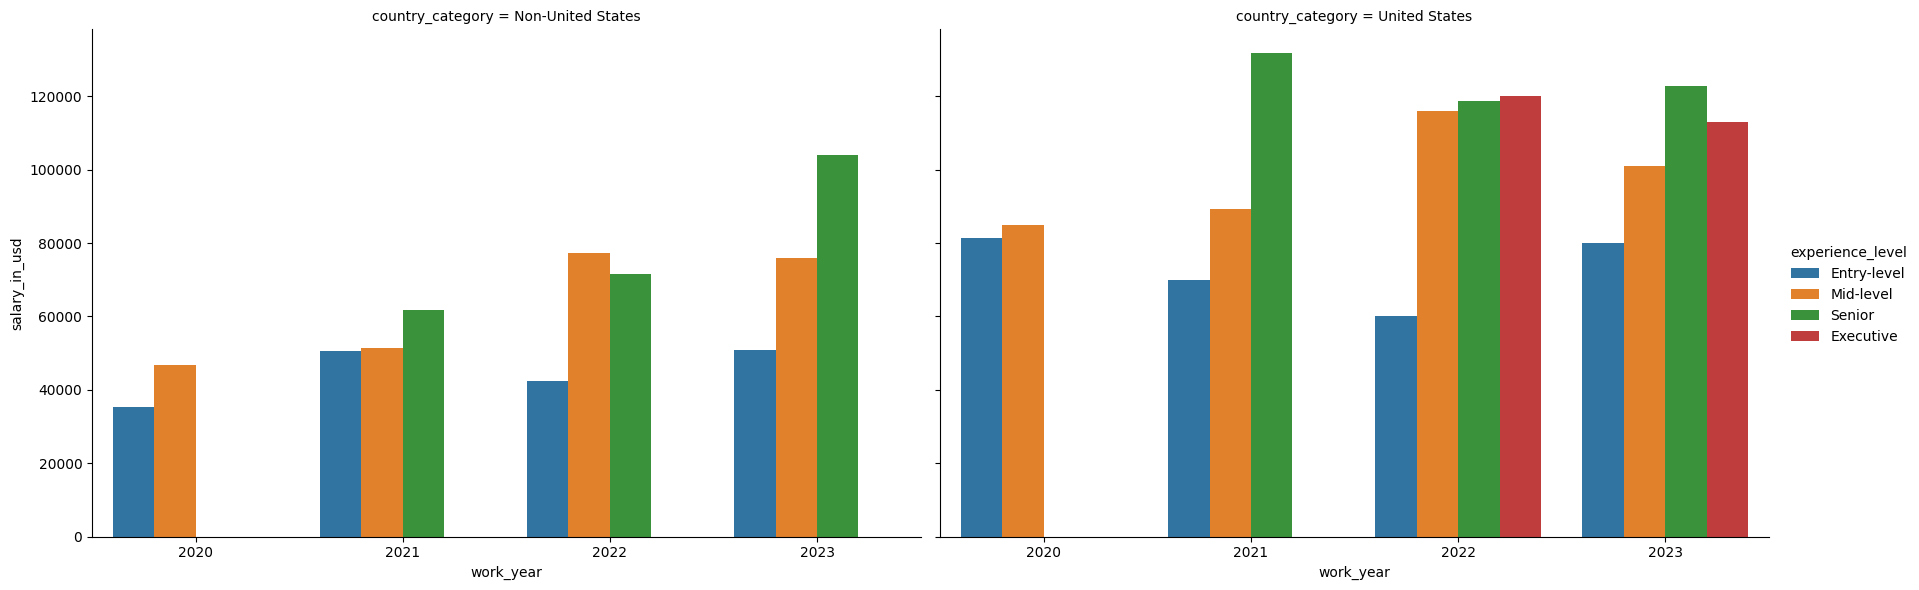

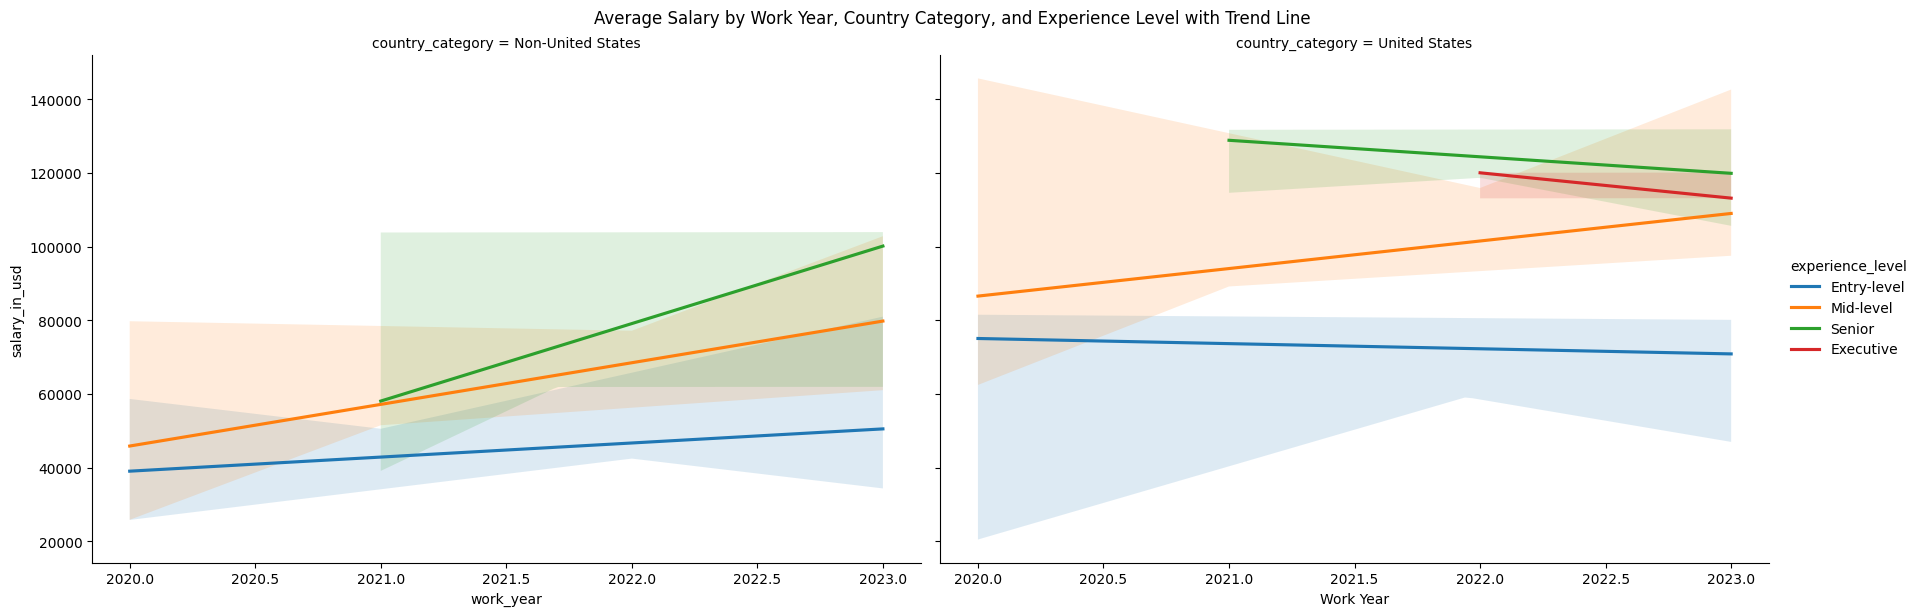

In [52]:
avg_salary = avg_salary.reset_index()
# Creating a combination plot (scatter plot + trend line)
plt.figure(figsize=(12, 6))
sns.catplot(
    x='work_year',
    y='salary_in_usd',
    hue='experience_level',
    col='country_category',  # Separate plots for each country category
    kind='bar',
    data=avg_salary,
    height=6,
    aspect=1.5
)

# Adding trend lines to each scatter plot
sns.lmplot(
    x='work_year',
    y='salary_in_usd',
    hue='experience_level',
    col='country_category',  # Separate plots for each country category
    data=avg_salary,
    height=6,
    aspect=1.5,
    scatter=False  # Suppress scatter points in lmplot
)

# Adding labels and title
plt.xlabel('Work Year')
plt.ylabel('Average Salary (USD)')
plt.suptitle('Average Salary by Work Year, Country Category, and Experience Level with Trend Line', y=1.02)

# Displaying the plot
plt.show()

Insight: 
-The average salary trend line on the Non-United Stated countries on all experience level are always rising from 2020 - 2023, but in the United States average data analyst salary are dropping, except for the mid-level analyst 

-There's only Executive Level Analysts on United States Analysts Group

## company size and experience Level impact on average salary?

In [53]:

comp_salary = df.groupby(['country_category','company_size','experience_level'])['salary_in_usd'].mean()
comp_salary

country_category   company_size  experience_level
Non-United States  L             Entry-level          36368.714286
                                 Mid-level            60947.000000
                                 Senior              117415.500000
                   M             Entry-level          52547.750000
                                 Mid-level            77166.453125
                                 Senior               95926.767123
                   S             Mid-level            20000.000000
                                 Senior               43456.000000
United States      L             Entry-level          68085.846154
                                 Mid-level            91350.000000
                                 Senior              150787.500000
                   M             Entry-level          79668.194805
                                 Executive           114107.142857
                                 Mid-level           104616.741135
            

<Figure size 1200x600 with 0 Axes>

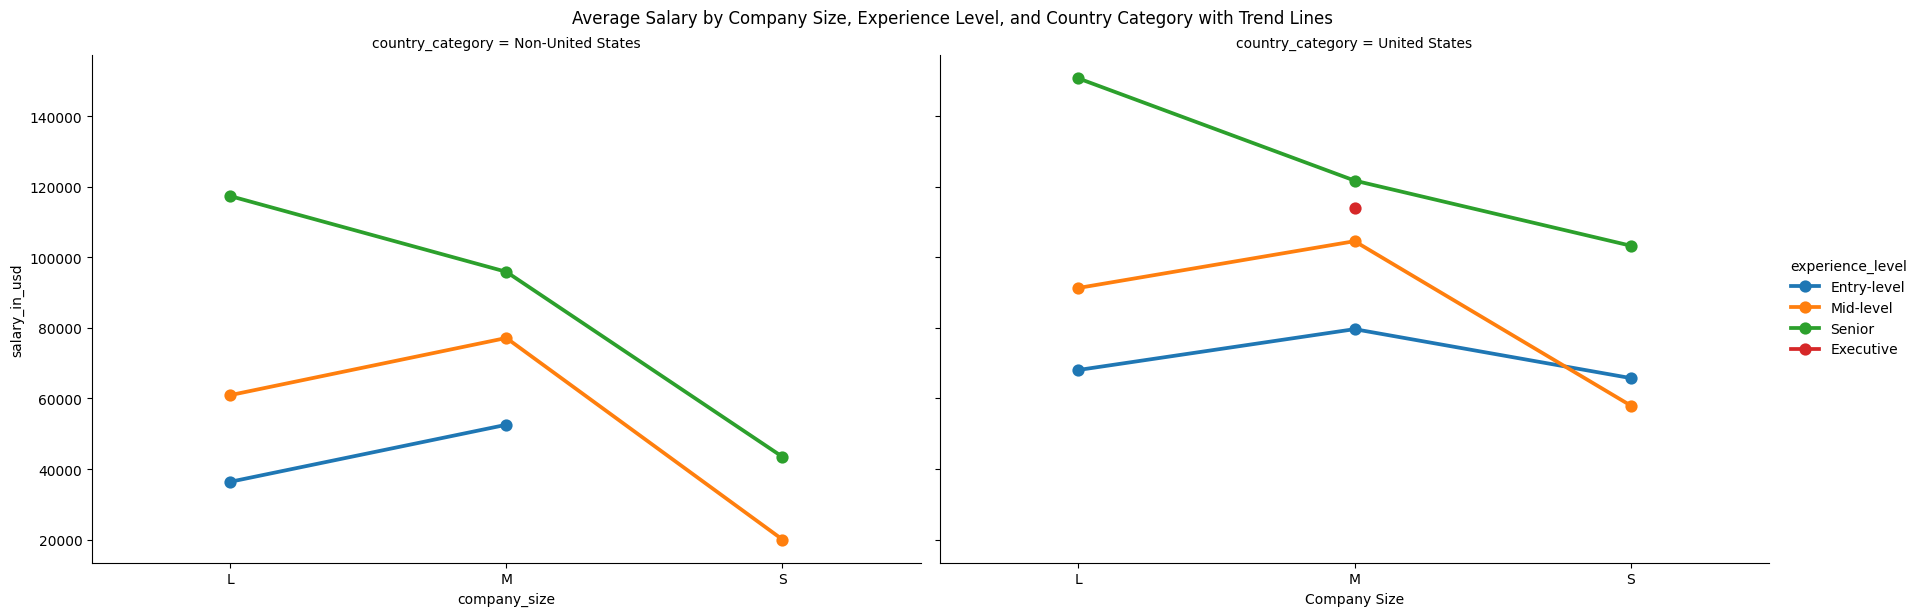

In [54]:
# Resetting the index for better plotting
comp_salary = comp_salary.reset_index()

# Creating a combination plot (scatter plot + trend line)
plt.figure(figsize=(12, 6))
sns.catplot(
    x='company_size',
    y='salary_in_usd',
    hue='experience_level',
    col='country_category',  # Separate plots for each country category
    kind='point',  # 'point' for scatter plot
    data=comp_salary,
    height=6,
    aspect=1.5
)

# Adding labels and title
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.suptitle('Average Salary by Company Size, Experience Level, and Country Category with Trend Lines', y=1.02)

# Displaying the plot
plt.show()

insight :
- In senior level, Company size impact average salary both United states and non-united states.
- both mid level experience in united states and non-united states have high average salary then entry and senior level.